# Generative vs Discriminative Models
Experimental Setup using Scikit-learn.
Details about imported models can be found https://scikit-learn.org/stable/index.html

In [10]:
!pip install numpy matplotlib pandas scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture

from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

np.random.seed(42)


In [11]:

def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    plt.title(title)


In [12]:

def show_data_diagnostics(X, y, title):
    df = pd.DataFrame(X, columns=["x1", "x2"])
    df["y"] = y

    print(f"\nCorrelation Matrix — {title}")
    print(df.corr())

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    plt.title(f"{title} — Input Space")

    plt.subplot(1, 2, 2)
    plt.hist(X[y == 0, 0], alpha=0.6, label="Class 0")
    plt.hist(X[y == 1, 0], alpha=0.6, label="Class 1")
    plt.legend()
    plt.title(f"{title} — Feature Distribution")

    plt.tight_layout()
    plt.show()


In [13]:

def evaluate(model, X, y, probabilistic=True):
    y_pred = model.predict(X)

    metrics = {
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred),
        "Recall": recall_score(y, y_pred),
        "F1": f1_score(y, y_pred)
    }

    if probabilistic:
        metrics["LogLoss"] = log_loss(y, model.predict_proba(X))
    else:
        metrics["LogLoss"] = None

    return metrics


In [14]:

def run_full_experiment(X, y, title, nonlinear=False):
    print("\n" + "="*60)
    print(f"DATASET: {title}")
    print("="*60)

    show_data_diagnostics(X, y, title)

    results = []

    lr = LogisticRegression()
    lr.fit(X, y)
    results.append(("Logistic Regression", evaluate(lr, X, y)))

    svm = SVC(kernel="rbf" if nonlinear else "linear", probability=True)
    svm.fit(X, y)
    results.append(("SVM", evaluate(svm, X, y)))

    nb = GaussianNB()
    nb.fit(X, y)
    results.append(("Naive Bayes", evaluate(nb, X, y)))

    gmm0 = GaussianMixture(n_components=2).fit(X[y == 0])
    gmm1 = GaussianMixture(n_components=2).fit(X[y == 1])

    class GMMClassifier:
        def predict(self, X):
            return (gmm1.score_samples(X) > gmm0.score_samples(X)).astype(int)

    gmm_preds = GMMClassifier().predict(X)
    results.append(("GMM", {"Accuracy": accuracy_score(y, gmm_preds)}))

    print("\nModel Performance:")
    for name, metrics in results:
        print(f"\n{name}")
        for k, v in metrics.items():
            print(f"  {k}: {v:.4f}" if v is not None else f"  {k}: N/A")

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plot_decision_boundary(lr, X, y, "Logistic Regression")

    plt.subplot(2, 2, 2)
    plot_decision_boundary(svm, X, y, "SVM")

    plt.subplot(2, 2, 3)
    plot_decision_boundary(nb, X, y, "Naive Bayes")

    plt.subplot(2, 2, 4)
    plot_decision_boundary(GMMClassifier(), X, y, "GMM")

    plt.tight_layout()
    plt.show()



DATASET: Moons Dataset

Correlation Matrix — Moons Dataset
          x1        x2         y
x1  1.000000 -0.381329  0.532431
x2 -0.381329  1.000000 -0.677127
y   0.532431 -0.677127  1.000000


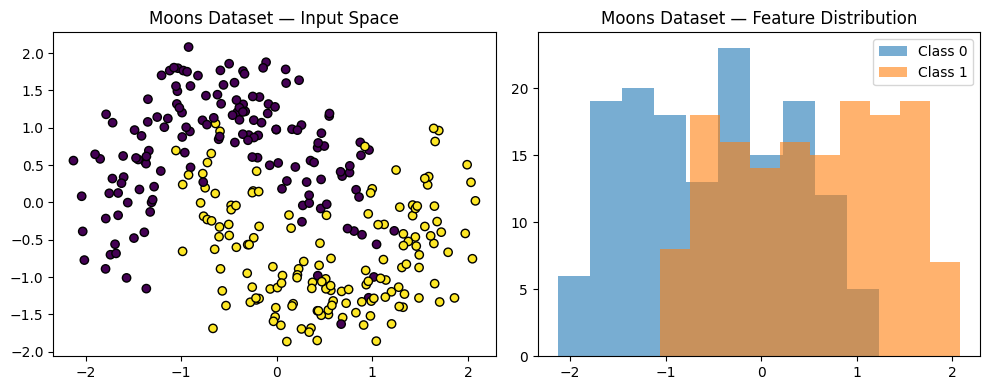


Model Performance:

Logistic Regression
  Accuracy: 0.8500
  Precision: 0.8571
  Recall: 0.8400
  F1: 0.8485
  LogLoss: 0.3502

SVM
  Accuracy: 0.9200
  Precision: 0.9257
  Recall: 0.9133
  F1: 0.9195
  LogLoss: 0.2044

Naive Bayes
  Accuracy: 0.8433
  Precision: 0.8552
  Recall: 0.8267
  F1: 0.8407
  LogLoss: 0.3626

GMM
  Accuracy: 0.9367


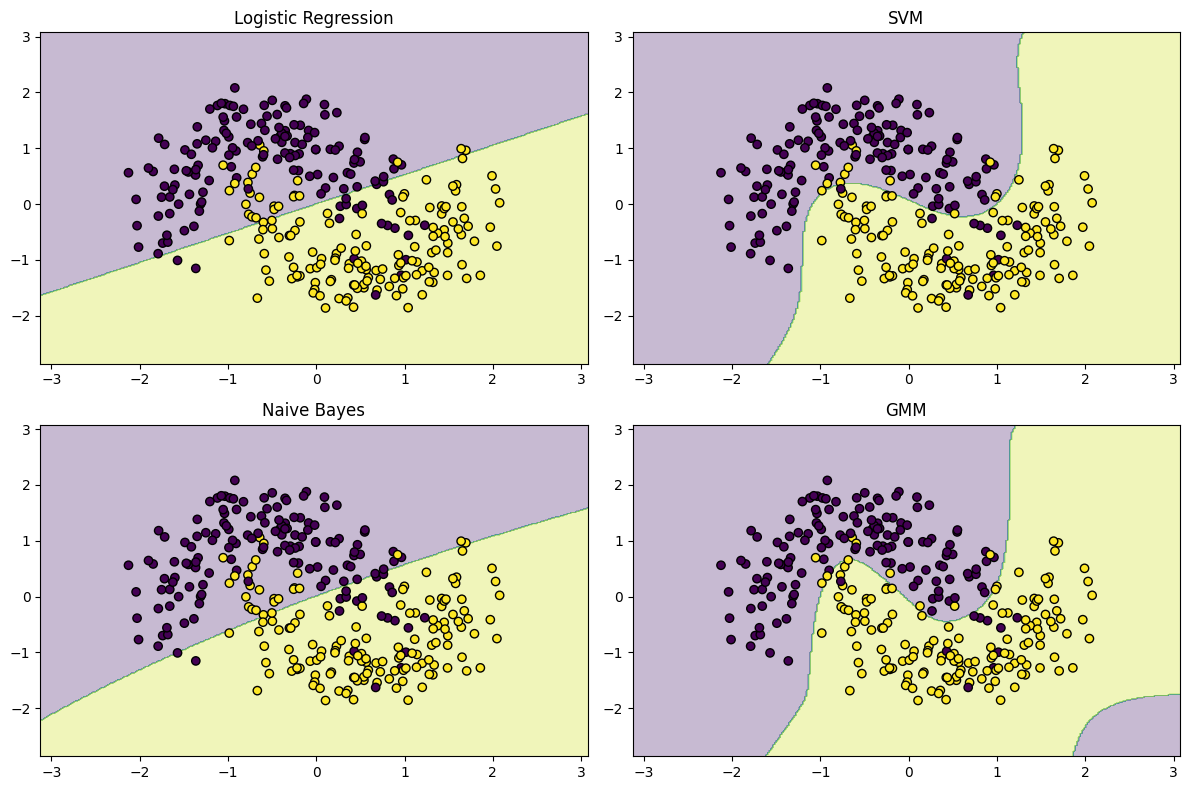

In [15]:
X, y = make_moons(n_samples=300, noise=0.25, random_state=2)
X = StandardScaler().fit_transform(X)
run_full_experiment(X, y, "Moons Dataset", nonlinear=True)



DATASET: Linear Blobs

Correlation Matrix — Linear Blobs
          x1        x2         y
x1  1.000000  0.715136 -0.873118
x2  0.715136  1.000000 -0.846842
y  -0.873118 -0.846842  1.000000


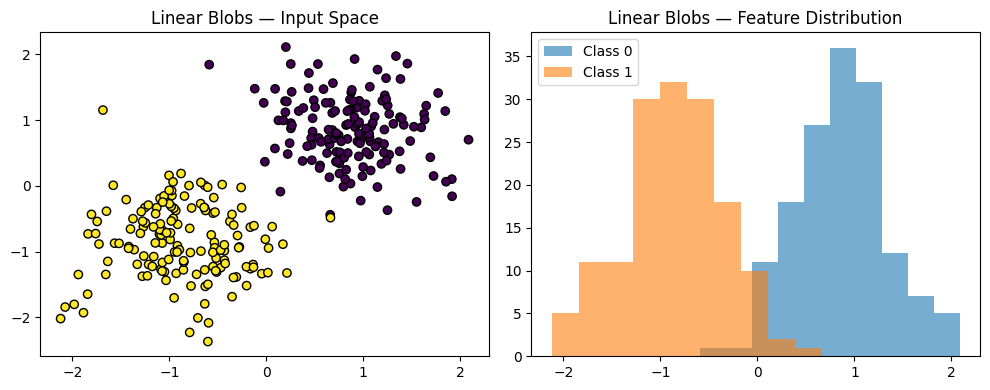


Model Performance:

Logistic Regression
  Accuracy: 0.9967
  Precision: 1.0000
  Recall: 0.9933
  F1: 0.9967
  LogLoss: 0.0291

SVM
  Accuracy: 0.9967
  Precision: 1.0000
  Recall: 0.9933
  F1: 0.9967
  LogLoss: 0.0196

Naive Bayes
  Accuracy: 0.9967
  Precision: 1.0000
  Recall: 0.9933
  F1: 0.9967
  LogLoss: 0.0097

GMM
  Accuracy: 0.9967


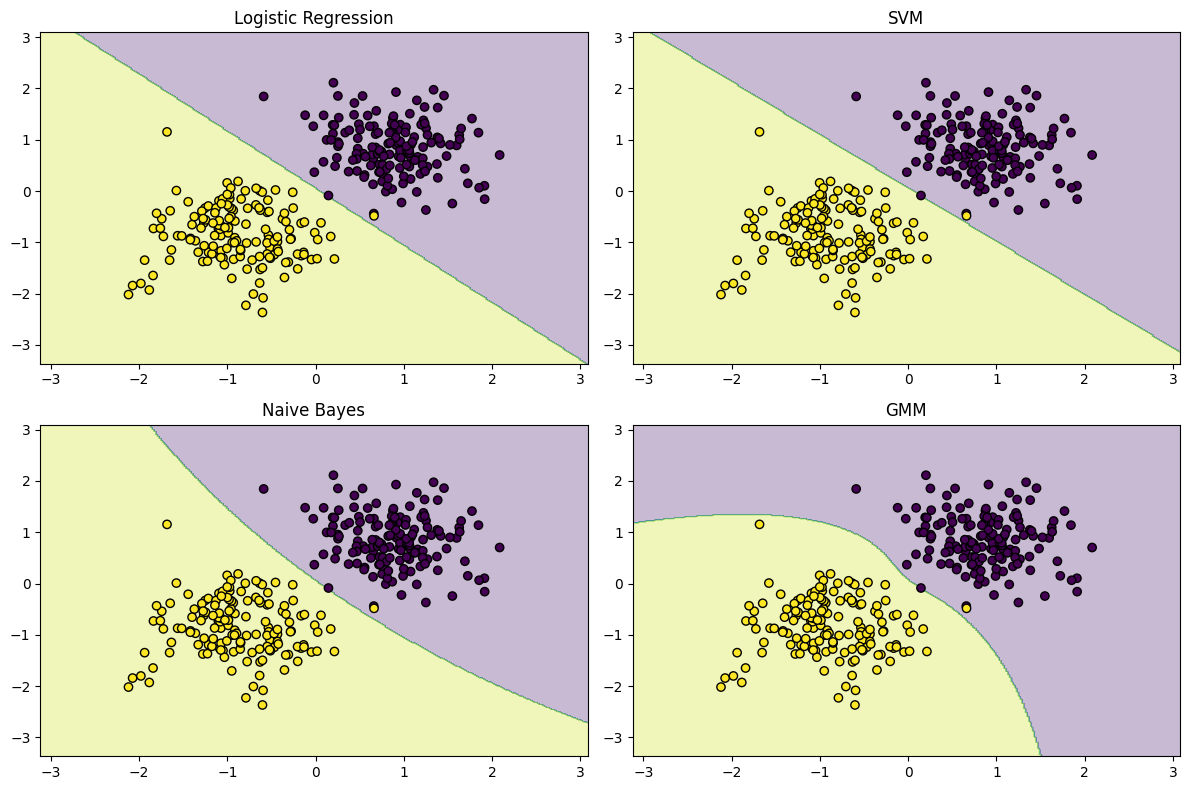

In [16]:

X, y = make_blobs(n_samples=300, centers=2, cluster_std=2.5, random_state=1)
X = StandardScaler().fit_transform(X)
run_full_experiment(X, y, "Linear Blobs")



DATASET: Overlapping Blobs

Correlation Matrix — Overlapping Blobs
          x1        x2         y
x1  1.000000 -0.394993  0.441878
x2 -0.394993  1.000000 -0.879171
y   0.441878 -0.879171  1.000000


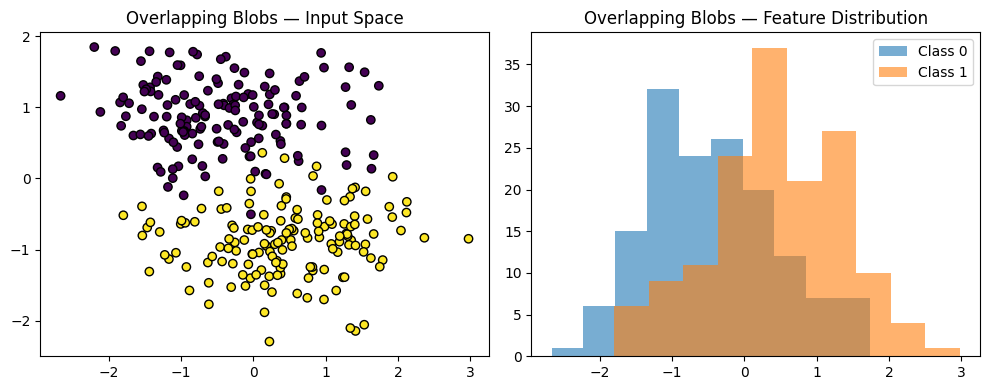


Model Performance:

Logistic Regression
  Accuracy: 0.9733
  Precision: 0.9733
  Recall: 0.9733
  F1: 0.9733
  LogLoss: 0.0930

SVM
  Accuracy: 0.9733
  Precision: 0.9733
  Recall: 0.9733
  F1: 0.9733
  LogLoss: 0.0817

Naive Bayes
  Accuracy: 0.9733
  Precision: 0.9733
  Recall: 0.9733
  F1: 0.9733
  LogLoss: 0.0768

GMM
  Accuracy: 0.9700


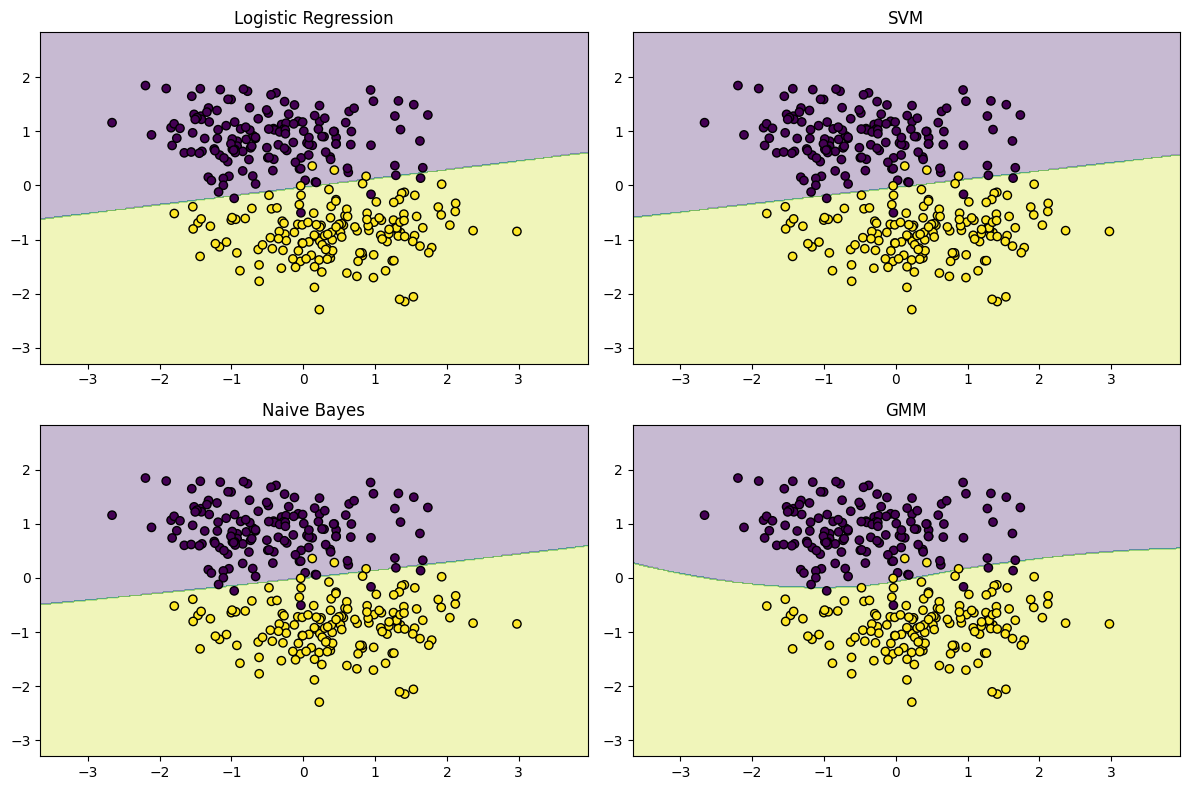

In [17]:

X, y = make_blobs(n_samples=300, centers=2, cluster_std=1.0, random_state=0)
X = StandardScaler().fit_transform(X)
run_full_experiment(X, y, "Overlapping Blobs")



DATASET: Circles Dataset

Correlation Matrix — Circles Dataset
          x1        x2         y
x1  1.000000 -0.011890 -0.002628
x2 -0.011890  1.000000  0.028638
y  -0.002628  0.028638  1.000000


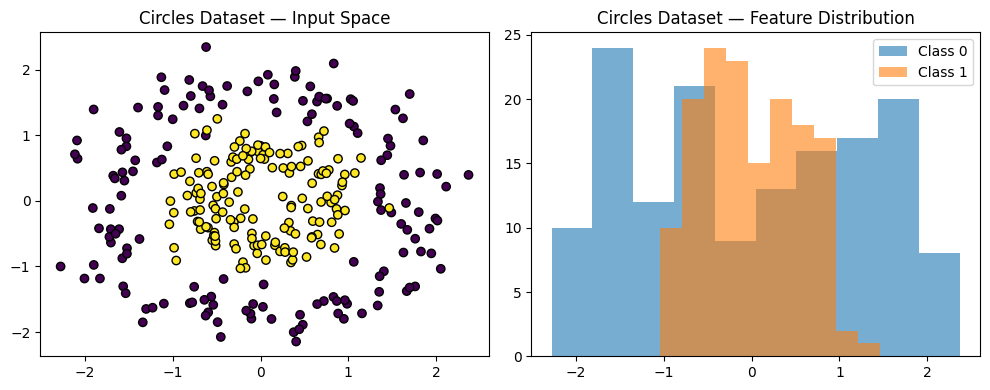


Model Performance:

Logistic Regression
  Accuracy: 0.5067
  Precision: 0.5067
  Recall: 0.5067
  F1: 0.5067
  LogLoss: 0.6927

SVM
  Accuracy: 0.9733
  Precision: 0.9931
  Recall: 0.9533
  F1: 0.9728
  LogLoss: 0.0599

Naive Bayes
  Accuracy: 0.9700
  Precision: 0.9930
  Recall: 0.9467
  F1: 0.9693
  LogLoss: 0.2577

GMM
  Accuracy: 0.9533


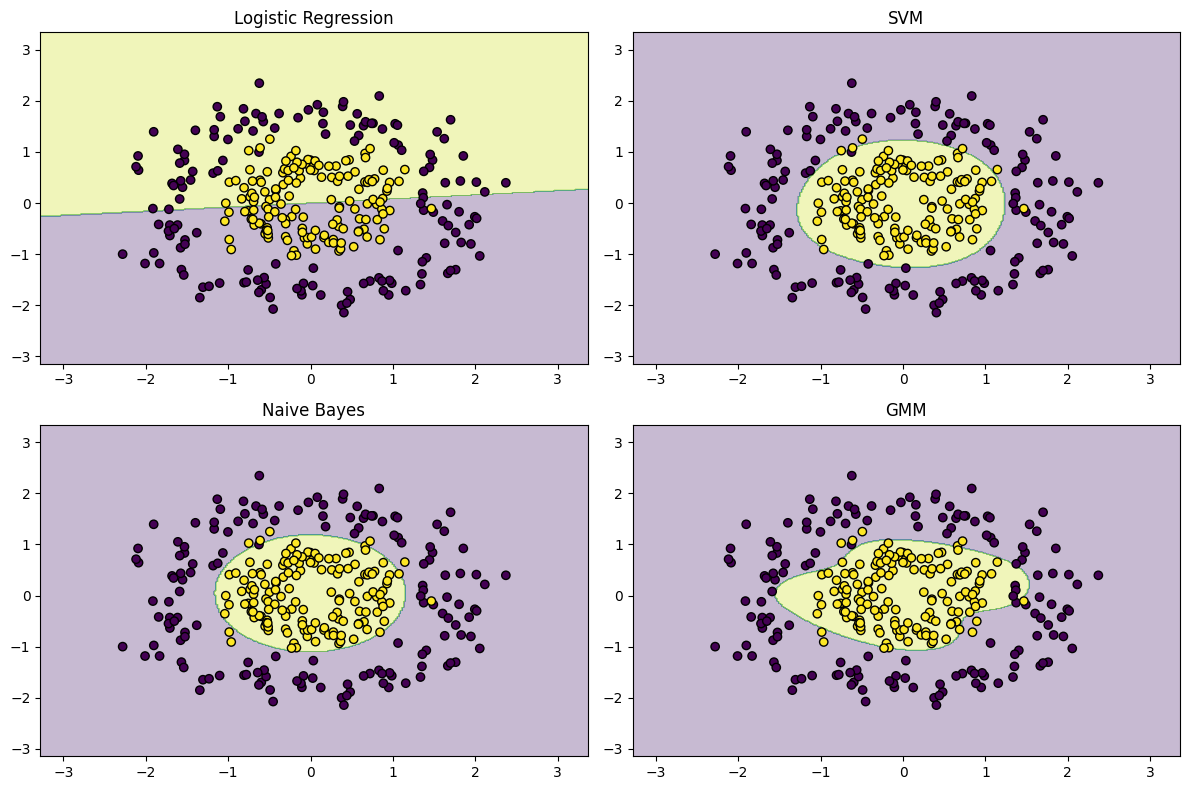

In [18]:

X, y = make_circles(n_samples=300, noise=0.15, factor=0.4, random_state=3)
X = StandardScaler().fit_transform(X)
run_full_experiment(X, y, "Circles Dataset", nonlinear=True)
